# Biologically Inspired Computation - Coursework 1
Team members :
Hugo Millet
Timothe Petitjean

**Part 1 : Imports**

In [1]:
import sys
assert sys.version_info >= (3, 5)

import math
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split

**Part 2 : Exploratory Data Analysis**

In [2]:
# By using excel, we changed the original format of the data into a csv file, for more simplicity
dataset = pd.read_csv('breast_cancer.csv')

In [3]:
dataset.shape

(569, 32)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column1   569 non-null    int64  
 1   Column2   569 non-null    object 
 2   Column3   569 non-null    float64
 3   Column4   569 non-null    float64
 4   Column5   569 non-null    float64
 5   Column6   569 non-null    float64
 6   Column7   569 non-null    float64
 7   Column8   569 non-null    float64
 8   Column9   569 non-null    float64
 9   Column10  569 non-null    float64
 10  Column11  569 non-null    float64
 11  Column12  569 non-null    float64
 12  Column13  569 non-null    float64
 13  Column14  569 non-null    float64
 14  Column15  569 non-null    float64
 15  Column16  569 non-null    float64
 16  Column17  569 non-null    float64
 17  Column18  569 non-null    float64
 18  Column19  569 non-null    float64
 19  Column20  569 non-null    float64
 20  Column21  569 non-null    float6

In [5]:
dataset.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Part 3 : Features Remodeling**

In [6]:
dataset.pop("Column1") # The ID is a useless feature
dataset = dataset.rename(columns = {"Column2":"Diagnostic"}) # Naming the output class correctly
for i in range(29):
  dataset = dataset.rename(columns = {"Column"+str(i+3):"Feature"+str(i)}) # More clarity for the other features
dataset = dataset.rename(columns = {"Column32":"Feature29"})

In [7]:
dataset['Diagnostic'] = dataset['Diagnostic'].apply(lambda x : 1 if x == "M" else 0) # From a letter to 0 or 1

In [8]:
dataset.head()

,Diagnostic,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X_class = dataset.drop('Diagnostic', 1)
y_class = dataset['Diagnostic']
# Creating training and testing sub datasets
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


**Part 4 : ANN Building**

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Scaling the values of the features
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [11]:
# Working with numpy is more convenient
# IMPORTANT : AFTER RUNNING ONCE, COMMENT THESE TWO LINES
# Otherwise the program will try to convert something already in a numpy format in a numpy and there will be
# an error
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [59]:
# Activation functions
def sigmoid(x):
    res = 1 / (1 + math.exp(-x*0.05)) # 0.05 for a smoother function according to our input values
    return res

def relu(x):
  res = max(0.0, x)
  return res

def hyperbolicTan(x):
  res = np.tanh(x)
  return res

In [13]:
# Vectorized versions of our activations functions
sigm_vect = np.vectorize(sigmoid)
relu_vect = np.vectorize(relu)
tanh_vect = np.vectorize(hyperbolicTan)

In [14]:
def create_ann(nbneurons):
  # We have only one hidden layer, but we can choose its number of neurons
  global weights1, weights2,bias1, bias2
  random.seed()
  input_layer = np.random.random((1, len(X_train[0]))) # shape : 1xn_features
  hidden_layer1 = np.random.random((1, nbneurons)) # shape : 1xn_neurons
  weights1 = np.random.random((len(X_train[1]), hidden_layer1.shape[1])) # shape : n_features*n_neurons
  bias1 = np.random.random((1, hidden_layer1.shape[1])) # shape : 1xn_neurons
  weights2 = np.random.random((nbneurons, 1)) # shape : n_neuronsx1
  bias2 = 0 # shape : 1x1

**Part 5 : ANN Training**

In [15]:
def ann_train(activ_funct, loss_funct, learning_rate, n_epochs):
  global weights1, weights2,bias1, bias2,dweights1
  for j in range(n_epochs):
    print("-epoch " + str(j) + "/" + str(n_epochs) + "-")
    for i in range(X_train.shape[0]):
      print("iteration :" + str(i))
      ## Defining input layer
      input_layer = np.zeros((1, len(X_train[i])))
      input_layer[0,:] = X_train[i] # Input being the features of the example
      ## Forward propagation
      print("---FORWARD PART---")
      # Hidden layer
      hidden_layer1 = np.matmul(input_layer,weights1)+bias1 # h = W*i+b
      # Different activations functions
      if activ_funct == "relu":
        hidden_layer1 = relu_vect(hidden_layer1)
      elif activ_funct == "tanh":
        hidden_layer1 = tanh_vect(hidden_layer1)
      else:
        hidden_layer1 = sigm_vect(hidden_layer1)

      # Output layer
      output = np.matmul(hidden_layer1, weights2)+bias2 # o = W*h+b
      # Different activations functions
      if activ_funct == "relu":
        output = relu_vect(output)
      elif activ_funct == "tanh":
        output = tanh_vect(output)
      else:
        output = sigm_vect(output)

      ## Loss calculation
      if loss_funct == "cross_entropy":
        loss = -(y_train[i]*math.log(output)+(1-y_train[i])*math.log(1-output))
      elif loss_funct == "hinge_loss":
        loss = max(0, 1-y_train[i]*output)
      loss_list[i] = loss
      print("loss : " + str(loss))

      ## Backward propagation
      print("---BACKWARD PART---")
      # Output -> Hidden layer
      # Derivatives of different loss functions
      if loss_funct == "cross_entropy":
        dloss = -y_train[i]/output + (1-y_train[i])/(1-output)
      elif loss_funct == "hinge_loss":
        if loss == 0:
          dloss = 0
        else:
          dloss = -y_train[i]
      if activ_funct == "relu":
        if output == 0:
          drelu = 0
        else:
          drelu = 1
        dz = dloss*drelu
      elif activ_funct == "tanh":
        dz = dloss*(1-output**2)
      else:
        dz = output-y_train[i]

      dweights2 = np.zeros(weights2.shape)
      # Derivatives of weights = input*dz
      dweights2 = hidden_layer1[0].reshape(weights2.shape)*dz

      # Derivatives of bias = dz
      dbias2 = dz

      alpha = learning_rate

      # Updating the weights
      weights2 = weights2-alpha*dweights2
      bias2 = bias2-alpha*dbias2

      # Hidden -> Input layer
      if activ_funct == "relu":
        dreluh = 0
        for h in hidden_layer1[0]:
          if h > 0:
            dreluh = 1
          # We need a 1x1 value in order for our dz matrix to be the right dimension
          # But this method is probably not the right one since our accuracy is not satisfying
        dz = dloss*np.matmul(weights2, dreluh)
      elif activ_funct == "tanh":
        dtanh = 1-np.matmul(hidden_layer1, np.transpose(hidden_layer1))
        dz = dloss*np.matmul(weights2, dtanh)
      else:
        dsigm = np.matmul(hidden_layer1, 1-np.transpose(hidden_layer1))
        dz = output-y_train[i]*(np.matmul(weights2, dsigm))
      
      dz = np.transpose(dz)
      dweights1 = np.zeros(weights1.shape)
      dbias1 = np.zeros(bias1.shape)
      # Derivatives of weights = input*dz
      dweights1 = np.matmul(np.transpose(input_layer), dz)
      dbias1 = dz
      
      # Updating weights and bias
      weights1 = weights1-alpha*dweights1
      bias1 = bias1-alpha*dbias1

**Part 6 : ANN Testing**

In [16]:
def ann_test(activ_funct):
    n_good_class = 0 # number of examples classed successfully
    global weights1, weights2,bias1, bias2,dweights1
    for i in range(X_test.shape[0]):
      # Same program as the forward propagation for the training, but this time on the test sample
      print("iteration :" + str(i))
      ## Defining input layer
      input_layer = np.zeros((1, len(X_test[i])))
      input_layer[0,:] = X_test[i]
      ## Forward propagation
      print("---FORWARD PART---")
      # Hidden layer
      hidden_layer1 = np.matmul(input_layer,weights1)+bias1
      if activ_funct == "relu":
        hidden_layer1 = relu_vect(hidden_layer1)
      elif activ_funct == "tanh":
        hidden_layer1 = tanh_vect(hidden_layer1)
      else:
        hidden_layer1 = sigm_vect(hidden_layer1)
      # Output layer
      output = np.matmul(hidden_layer1, weights2)+bias2
      if activ_funct == "relu":
        output = relu_vect(output)
      elif activ_funct == "tanh":
        output = tanh_vect(output)
      else:
        output = sigm_vect(output)
      # Binary classification
      if output < 0.5:
        output = 0
      else:
        output = 1
      if output == y_test[i]:
        print("example successfully classed")
        n_good_class += 1
    accuracy = n_good_class/len(y_test)
    print("accuracy : " + str(accuracy))

In [17]:
loss_list = np.zeros(X_train.shape[0])

In [81]:
create_ann(4) # hidden layer with n neurons

In [82]:
ann_train("sigmoid", "cross_entropy", 0.5, 1) # Training the network with the hyperparameters

-epoch 0/1-
iteration :0
---FORWARD PART---
loss : 0.6586998750373233
---BACKWARD PART---
iteration :1
---FORWARD PART---
loss : 0.6279844466390367
---BACKWARD PART---
iteration :2
---FORWARD PART---
loss : 0.6355493528334878
---BACKWARD PART---
iteration :3
---FORWARD PART---
loss : 0.7544272383426655
---BACKWARD PART---
iteration :4
---FORWARD PART---
loss : 0.6207113722344249
---BACKWARD PART---
iteration :5
---FORWARD PART---
loss : 0.5986095832485487
---BACKWARD PART---
iteration :6
---FORWARD PART---
loss : 0.7711396545677064
---BACKWARD PART---
iteration :7
---FORWARD PART---
loss : 0.7682860651676914
---BACKWARD PART---
iteration :8
---FORWARD PART---
loss : 0.7310729366091322
---BACKWARD PART---
iteration :9
---FORWARD PART---
loss : 0.7467443099040026
---BACKWARD PART---
iteration :10
---FORWARD PART---
loss : 0.7134523219458906
---BACKWARD PART---
iteration :11
---FORWARD PART---
loss : 0.6884037449461416
---BACKWARD PART---
iteration :12
---FORWARD PART---
loss : 0.68697260

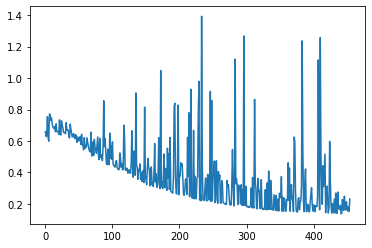

In [83]:
plt.plot(loss_list)
plt.show()

In [84]:
ann_test("sigmoid") # Testing the network

iteration :0
---FORWARD PART---
example successfully classed
iteration :1
---FORWARD PART---
iteration :2
---FORWARD PART---
example successfully classed
iteration :3
---FORWARD PART---
example successfully classed
iteration :4
---FORWARD PART---
example successfully classed
iteration :5
---FORWARD PART---
example successfully classed
iteration :6
---FORWARD PART---
example successfully classed
iteration :7
---FORWARD PART---
example successfully classed
iteration :8
---FORWARD PART---
example successfully classed
iteration :9
---FORWARD PART---
example successfully classed
iteration :10
---FORWARD PART---
example successfully classed
iteration :11
---FORWARD PART---
example successfully classed
iteration :12
---FORWARD PART---
example successfully classed
iteration :13
---FORWARD PART---
example successfully classed
iteration :14
---FORWARD PART---
example successfully classed
iteration :15
---FORWARD PART---
example successfully classed
iteration :16
---FORWARD PART---
example succes